Add needed modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

read the csv's

In [2]:
obs = pd.read_csv('observations.csv')
spc = pd.read_csv('species_info.csv')

Let's explore the data.

In [3]:
spc.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
spc.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [5]:
spc.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [6]:
spc.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
spc.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

The dataset appears to not suffer from missing data issues. It's assumed that the missing records in conservation_status are structural.

In [8]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [9]:
obs.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

In [10]:
obs.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


No missing data. Observations include a single datapoint for observations of each species in each national park.

Let's look at the total observations per park

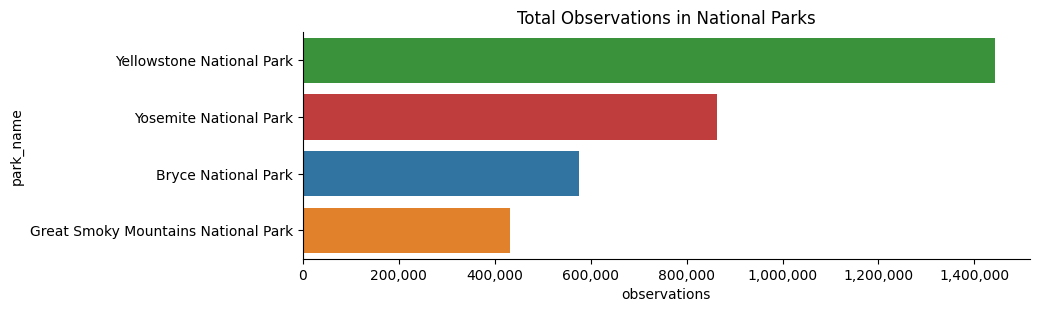

In [11]:
park_sum = obs.groupby('park_name', group_keys=False).observations.sum().reset_index()


order = park_sum.groupby(['park_name']).sum().sort_values('observations' , ascending = False).index
a=sns.catplot(
    data=park_sum, kind="bar",
    x="observations", y="park_name",
    order=order,
    #native_scale=True,
    height = 3, aspect = 3.5, hue="park_name").set(title="Total Observations in National Parks") 

ax = a.fig.axes[0]
ax.get_xaxis().set_major_formatter(
  mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [67]:
park_sum.observations.sum()

3314739

Next let's look at the total observations of feral animals within US national parks.

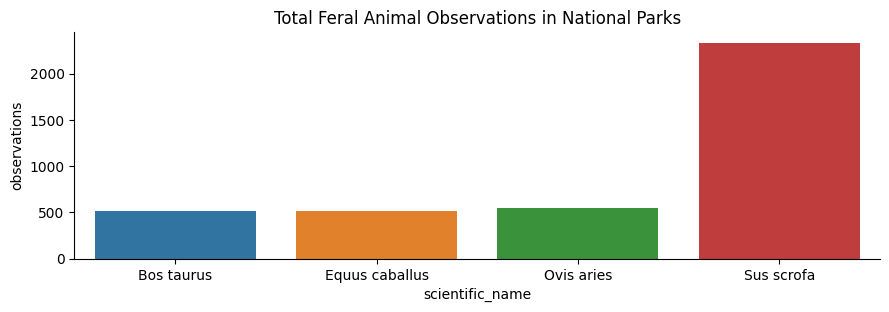

In [13]:
feral = spc.loc[spc.common_names.str.contains('Feral'),:]
feral_obs = pd.merge(feral,obs)
feral_sum = feral_obs.groupby('scientific_name', group_keys=False).sum()
A=sns.catplot(
    data=feral_sum, kind="bar",
    x="scientific_name", y="observations",
    height = 3, aspect = 3, hue="scientific_name").set(title="Total Feral Animal Observations in National Parks") 

Next, let's look at feral crops. However, feral crops are not noted in the data. Let's import a list of feral crops noted in https://nph.onlinelibrary.wiley.com/doi/full/10.1002/ppp3.10367

In [14]:
feral_plants = pd.read_csv('feral_crop_names.csv', encoding = "ISO-8859-1")

In [66]:
feral_plants.head()

,crop_relative,feral_name,family,feral_type,life_history,crop_use,feral_locations,recent_citations,scientific_name,common_name
0,Alfalfa (Medicago sativa),-,Fabaceae,-,Perennial,Forage and grain,Canada; USA,"(Bagavathiannan et al., 2010)",Medicago sativa,Alfalfa
1,Apple (Malus domestica),-,Rosaceae,Endoferal,Deciduous,Fruit,"Canada, Europe","(Cronin et al., 2020; Kiek et al., 2021)",Malus domestica,Apple
2,Apricot (Prunus armeniaca),-,Rosaceae,-,Deciduous,Fruit,Dagestan,"(Asadulaev et al., 2014)",Prunus armeniaca,Apricot
3,Artichoke (Cynara cardunclus),-,Asteraceae,Exoferal/\nendoferal?,Perennial,Vegetable,Iberian Peninsula,"(Leak-Garcia et al., 2013; Pavan et al., 2018)",Cynara cardunclus,Artichoke
4,Barley (Hordeum vulgare),Hordeum spontaneum,Poaceae,Exo-endoferal,Annual,Grain,Tibet,"(Civá? et al., 2021; Zeng et al., 2018)",Hordeum vulgare,Barley


Let's now look at the total observations of feral plants in National Parks.

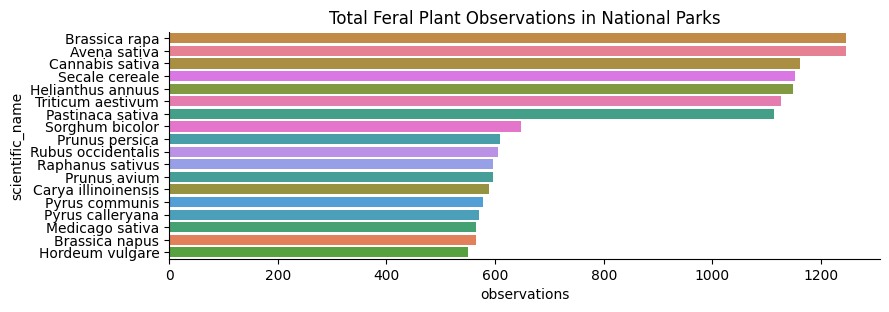

In [15]:
feral_plants_obs = pd.merge(feral_plants,obs)
feral_plants_sum = feral_plants_obs.groupby('scientific_name', group_keys=False).observations.sum().reset_index()

# sort dataframe
order = feral_plants_sum.groupby(['scientific_name']).sum().sort_values('observations' , ascending = False).index
A=sns.catplot(
    data=feral_plants_sum, kind="bar",
    x="observations", y="scientific_name",
    height = 3, aspect = 3, hue="scientific_name",
    order=order
).set(title="Total Feral Plant Observations in National Parks") 


In [16]:
feral_plants_sum.head()

,scientific_name,observations
0,Avena sativa,1245
1,Brassica napus,564
2,Brassica rapa,1246
3,Cannabis sativa,1161
4,Carya illinoinensis,589


Next let's total feral plants by park.

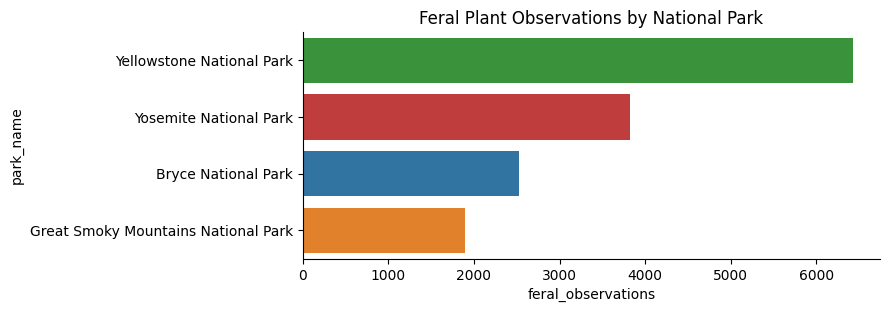

In [17]:
feral_loc_tots = feral_plants_obs.groupby('park_name', group_keys=False).observations.sum().reset_index()
feral_loc_tots = feral_loc_tots.rename(columns={'observations': 'feral_observations'})
order = feral_loc_tots.groupby(['park_name']).sum().sort_values('feral_observations' , ascending = False).index
A=sns.catplot(
    data=feral_loc_tots, kind="bar",
    x="feral_observations", y="park_name",
    height = 3, aspect = 3, hue="park_name",
    order=order
).set(title="Feral Plant Observations by National Park") 

In [21]:
feral_loc_tots.head()

,park_name,feral_observations
0,Bryce National Park,2524
1,Great Smoky Mountains National Park,1891
2,Yellowstone National Park,6422
3,Yosemite National Park,3825


That's a large amount of feral plants observed in National Parks. Let's add the acreage of the sample National Parks for context.

Input National Parks acreage from https://www.nps.gov/subjects/lwcf/acreagereports.htm

In [68]:
npa_dict = {'park_name':['Yellowstone National Park','Yosemite National Park','Bryce National Park','Great Smoky Mountains National Park']
           , 'acreage':[2219790.71,761747.50,35835.08,522426.88]
           }
npa = pd.DataFrame.from_dict(npa_dict)

In [72]:
npa.style.hide(axis="index")

park_name,acreage
Yellowstone National Park,2219790.710000
Yosemite National Park,761747.500000
Bryce National Park,35835.080000
Great Smoky Mountains National Park,522426.880000


Merge with the park totals and view feral plant observations per acre.

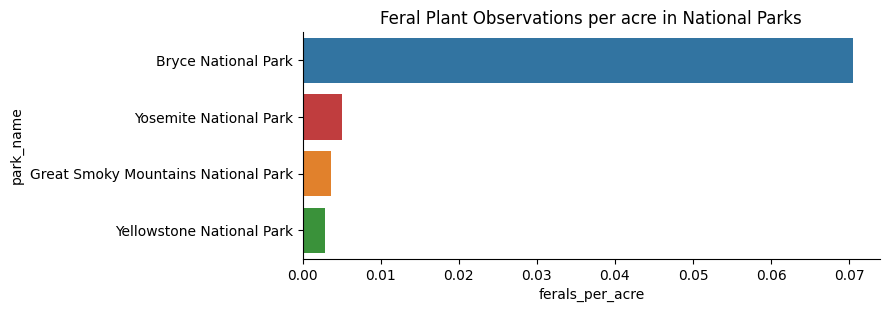

In [24]:
feral_loc_acre = pd.merge(feral_loc_tots,npa, left_on='park_name',right_on='park_name')
feral_loc_acre['ferals_per_acre'] = feral_loc_acre.feral_observations / feral_loc_acre.acreage

order = feral_loc_acre.groupby(['park_name'], group_keys=False).sum().sort_values('ferals_per_acre' , ascending = False).index
#order = feral_loc_acre.sort_values('ferals_per_acre' , ascending = False).index
A=sns.catplot(
    data=feral_loc_acre, kind="bar",
    x="ferals_per_acre", y="park_name",
    height = 3, aspect = 3, hue="park_name",
    order=order
).set(title="Feral Plant Observations per acre in National Parks") 

Uh Oh. That's a disturbing amount of feral observations in one park. Let's look at total observations per acre to see if one park is overrepresented.

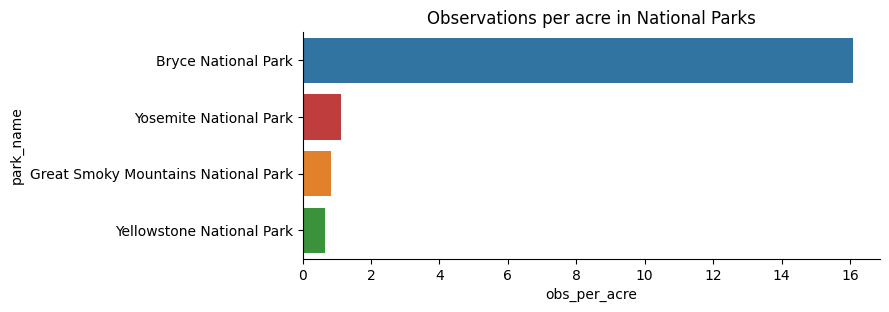

In [25]:
obs_loc_tots = obs.groupby('park_name', group_keys=False).observations.sum()
obs_loc_acre = pd.merge(obs_loc_tots,npa, left_on='park_name',right_on='park_name')
obs_loc_acre['obs_per_acre'] = obs_loc_acre.observations / obs_loc_acre.acreage
order = obs_loc_acre.groupby(['park_name']).sum().sort_values('obs_per_acre' , ascending = False).index
A=sns.catplot(
    data=obs_loc_acre, kind="bar",
    x="obs_per_acre", y="park_name",
    height = 3, aspect = 3, hue="park_name",
    order=order
).set(title="Observations per acre in National Parks") 

In [26]:
obs_loc_acre.head()

,park_name,observations,acreage,obs_per_acre
0,Bryce National Park,576025,35835.08,16.074333
1,Great Smoky Mountains National Park,431820,522426.88,0.826565
2,Yellowstone National Park,1443562,2219790.71,0.650314
3,Yosemite National Park,863332,761747.50,1.133357


It appears Bryce National Park is overrepresented in the data by acre. Let's approach things differently and see what percentage of observations in each park is a feral plant.

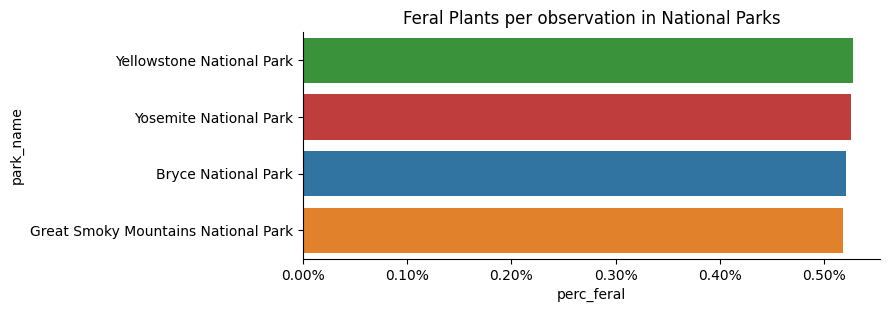

In [39]:
vplants = spc.loc[spc['category'] == 'Vascular Plant']
vp_obs = pd.merge(vplants,obs)
park_vplant_sum = vp_obs.groupby('park_name', group_keys=False).observations.sum().reset_index()
feral_obs_tots = pd.merge(park_vplant_sum,feral_loc_tots, left_on=['park_name'],right_on=['park_name'],how='left')
feral_obs_tots['perc_feral'] = feral_obs_tots.feral_observations / feral_obs_tots.observations

order = feral_obs_tots.groupby(['park_name']).sum().sort_values('perc_feral' , ascending = False).index
a=sns.catplot(
    data=feral_obs_tots, kind="bar",
    x="perc_feral", y="park_name",
    height = 3, aspect = 3, hue="park_name",
    order=order
).set(title="Feral Plants per observation in National Parks") 

ax = a.fig.axes[0]
#ax.get_xaxis().set_major_formatter(mpl.ticker.PercentFormatter())

#fmt = "{x:.2%}"
#yticks = mpl.ticker.FormatStrFormatter(fmt)
#ax.yaxis.set_major_formatter(yticks)

# Define the custom formatting function for percentages
def y_fmt(x, pos):
    return f"{x:.2%}"

# Apply the custom formatter to the y-axis ticks
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))


#a.set(xlim=(0.006, 0.007))

In [28]:
feral_obs_tots.head()

,park_name,observations,feral_observations,perc_feral
0,Bryce National Park,484373,2524,0.005211
1,Great Smoky Mountains National Park,364882,1891,0.005182
2,Yellowstone National Park,1218162,6422,0.005272
3,Yosemite National Park,727895,3825,0.005255


It appears that 0.5% or 1 in 200 observed vascular plants in National Parks is a feral crop.

Next, let's do the same for conservation status.

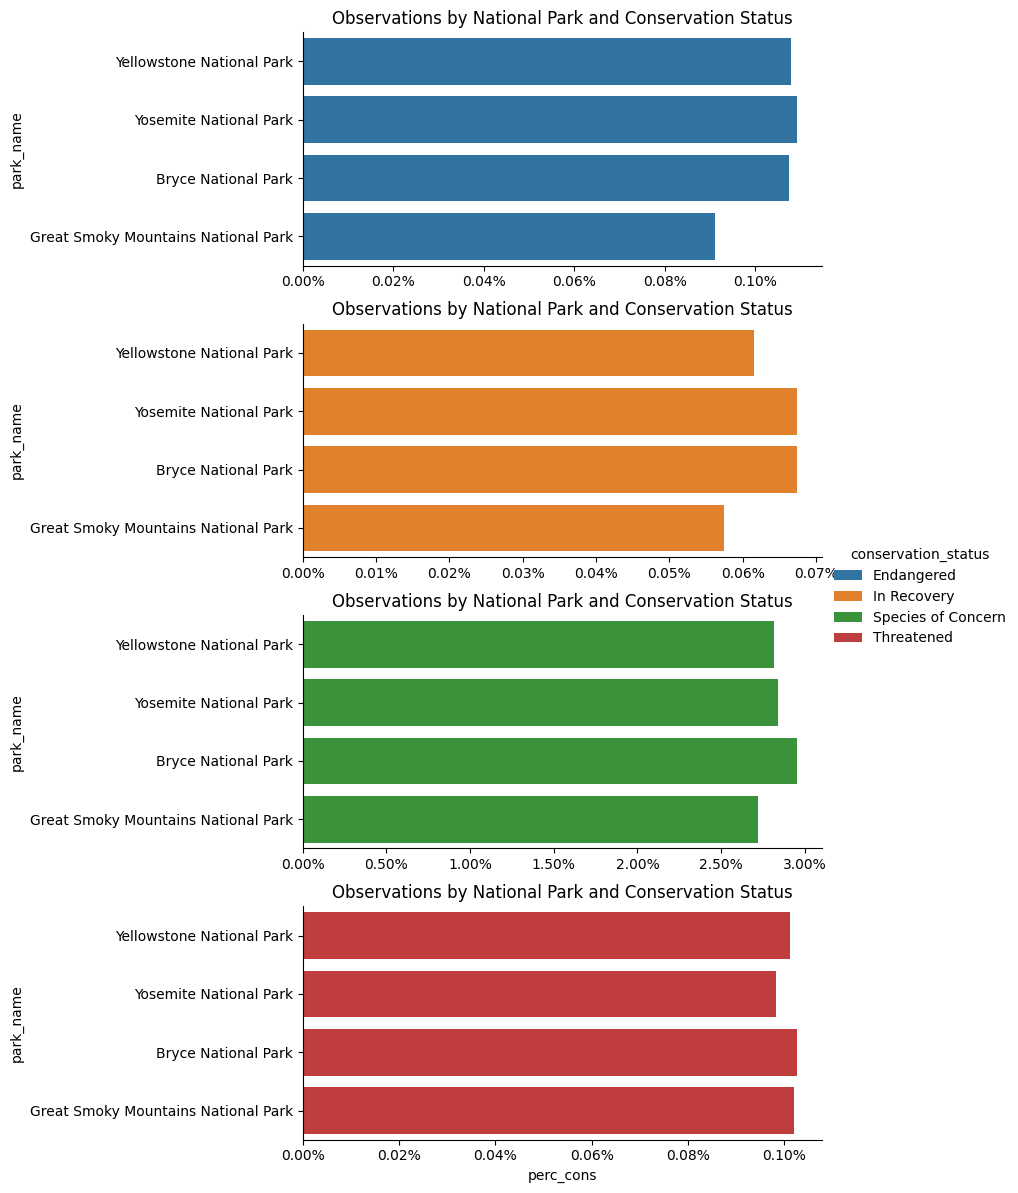

In [65]:
#cons_spc = spc[spc[conservation_status].notnull()]
cons_spc = spc[spc.conservation_status.notnull()]
#cons_spc1 = spc["conservation_status"].fillna("Least Concern") 
cons_obs = pd.merge(cons_spc,obs, left_on='scientific_name',right_on='scientific_name')
cons_loc_tots = cons_obs.groupby(['park_name','conservation_status'], group_keys=False).observations.sum().reset_index()
cons_loc_tots = cons_loc_tots.rename(columns={'observations': 'cons_observations'})

cons_obs_tots = pd.merge(park_sum,cons_loc_tots, left_on=['park_name'],right_on=['park_name'],how='left')
cons_obs_tots['perc_cons'] = cons_obs_tots.cons_observations / cons_obs_tots.observations

order = cons_obs_tots.groupby(['park_name']).sum().sort_values('perc_cons' , ascending = False).index


order = cons_loc_tots.groupby('park_name').sum().sort_values('cons_observations' , ascending = False).index
a=sns.catplot(
    data=cons_obs_tots, kind="bar",
    x="perc_cons", y="park_name", row="conservation_status",
    height = 3, aspect = 3, hue="conservation_status",
    order=order,
    sharex=False
).set(title="Observations by National Park and Conservation Status") 

# Define the custom formatting function for percentages
def y_fmt(x, pos):
    return f"{x:.2%}"

for ax in a.fig.axes:
  # Apply the custom formatter to the y-axis ticks
  ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))

In [41]:
cons_obs_tots

,park_name,observations,conservation_status,cons_observations,perc_cons
0,Bryce National Park,576025,Endangered,619,0.001075
1,Bryce National Park,576025,In Recovery,388,0.000674
2,Bryce National Park,576025,Species of Concern,17011,0.029532
3,Bryce National Park,576025,Threatened,591,0.001026
4,Great Smoky Mountains National Park,431820,Endangered,393,0.000910
5,Great Smoky Mountains National Park,431820,In Recovery,248,0.000574
6,Great Smoky Mountains National Park,431820,Species of Concern,11735,0.027176
7,Great Smoky Mountains National Park,431820,Threatened,440,0.001019
8,Yellowstone National Park,1443562,Endangered,1558,0.001079
9,Yellowstone National Park,1443562,In Recovery,889,0.000616


Conclusions: There are neither any significant differences in the prevalance of feral plant populations, nor threatened species by national park location. 

However, there are large differences between the number of species survey observations by acreage between parks. This could indicate that NPS resources are not being allocated to match the acreage managed.

While NPS deploys multiple Invasive Plant Management Teams (IPMT's) to eradicate invasive species within national parks, there are no indications that NPS works to remove feral crops from national parklands.

Given that feral crops comprise 1 in 200 observed vascular plants, more work needs to be done to preserve native species from incursions of feral crops within protected environments. 